In [3]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import unicodedata
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_pop = pd.read_csv('population.txt')

df_atus_17 = pd.read_csv('atus_anual_2017.csv')
df_atus_17 = df_atus_17[df_atus17.ID_ENTIDAD==9]
df_atus_17 = df_atus_17.reset_index().drop('index',axis=1)

df_atus_16 = pd.read_csv('atus_anual_2016.csv')
df_atus_16 = df_atus_16[df_atus16.ID_ENTIDAD==9]
df_atus_16 = df_atus_16.reset_index().drop('index',axis=1)

df_atus_15 = pd.read_csv('atus_anual_2015.csv')
df_atus_15 = df_atus_15[df_atus15.ID_ENTIDAD==9]
df_atus_15 = df_atus_15.reset_index().drop('index',axis=1)

In [8]:
df_18 = pd.read_csv('datos2018.csv', delimiter=';')

In [9]:
df_17 = pd.read_csv('datos2017.csv', delimiter=';')

In [10]:
df_16 = pd.read_csv('datos2016.csv', delimiter=';')

In [11]:
df_15 = pd.read_csv('datos2015.csv', delimiter=';')

In [12]:
df_18.columns= ['the_geom', 'relation', 'the_geom_w',
       'accident', 'latitud', 'longitud',
       'zip_code', 'street', 'neighbourhood', 'cause',
       'vehicle', 'color', 'model', 'damage_level',
       'impact_on', 'year', 'month', 'day',
       'day_of_week', 'time', 'state', 'borough',
       'injured', 'cartodb_id', 'age',
       'gender', 'injury_level', 'hospitalized',
       'dead', 'ambulance', 'tree', 'rock',
       'sleeping', 'crane', 'infrastructure_works',
       'pavement', 'explosion', 'rollover',
       'loss', 'driver', 'escape',
       'alcohol', 'motorbike', 'bike',
       'insurance', 'taxi', 'animal', 'location']

In [13]:
df_16.columns = ['the_geom', 'relation', 'the_geom_w', 'cause', 'accident',
       'latitud', 'longitud',
       'zip_code', 'street', 'neighbourhood',
       'vehicle', 'color', 'model', 'damage_level',
       'impact_on', 'year', 'month', 'day',
       'day_of_week', 'time', 'state', 'borough',
       'injured', 'cartodb_id', 'age',
       'gender', 'injury_level', 'hospitalized',
       'dead', 'ambulance', 'tree', 'rock',
       'sleeping', 'crane', 'infrastructure_works',
       'pavement', 'explosion', 'rollover',
       'loss', 'driver', 'escape',
       'alcohol', 'motorbike', 'bike',
       'insurance', 'taxi', 'animal', 'location']

In [14]:
df_15 = df_15.drop('_feature_c,N,10,0', axis=1)

In [15]:
df_15.columns = ['the_geom', 'age', 'cause', 'the_geom_w', 'accident',
       'latitud', 'longitud',
       'zip_code', 'street', 'neighbourhood',
       'vehicle', 'color', 'model', 'damage_level',
       'impact_on', 'year', 'month', 'day',
       'day_of_week', 'time', 'state', 'borough',
       'injured', 'relation', 'cartodb_id',
       'gender', 'injury_level', 'hospitalized',
       'dead', 'ambulance', 'tree', 'rock',
       'sleeping', 'crane', 'infrastructure_works',
       'pavement', 'explosion', 'rollover',
       'loss', 'driver', 'escape',
       'alcohol', 'motorbike', 'bike',
       'insurance', 'taxi', 'animal', 'location']

In [16]:
df_17.columns = df_18.columns

In [18]:
df = pd.concat([df_18, df_17, df_16, df_15], axis=0)

df_atus = pd.concat([df_atus_17, df_atus_16, df_atus_15], axis=0 ,sort=True)

In [20]:
df = df.reset_index().drop('index',axis=1)

In [53]:
df.damage_level = df.damage_level.replace(to_replace = 'Sin da??o', value = 'Sin daño')
df.cause = df.cause.replace(to_replace = 'DA?æOS POR LA CARGA', value='DAÑOS POR LA CARGA')
df.vehicle = df.vehicle.replace(to_replace='Cami??n', value='Camión')
df.vehicle = df.vehicle.replace(to_replace='Cami??n Ligero', value='Camión Ligero')

In [22]:
pl.bar(df.groupby('damage_level').size().sort_values(ascending=False).keys(),
       np.array(df.groupby('damage_level').size().sort_values(ascending=False)));

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

AttributeError: 'NoneType' object has no attribute 'seq'

In [ ]:
pl.bar(df.groupby('cause').size().sort_values(ascending=False).keys(),
       np.array(df.groupby('cause').size().sort_values(ascending=False)))
pl.xticks(rotation=90)
pl.ylim(0,1200);

In [6]:
#pl.figure(figsize=(15,5))
pl.bar(df.groupby('day_of_week').size().sort_values(ascending=False).keys(),
       np.array(df.groupby('day_of_week').size().sort_values(ascending=False)))
pl.xticks(rotation=90);

NameError: name 'df' is not defined

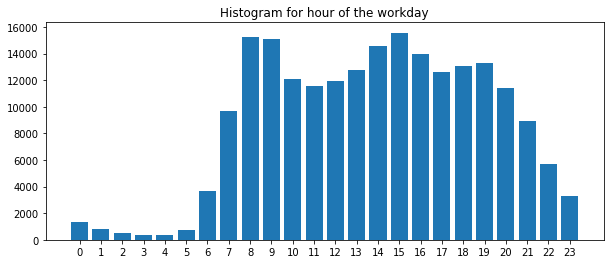

In [285]:
pl.figure(figsize=(10,4))
pl.bar(df[(df.day_of_week!='SABADO')&(df.day_of_week!='DOMINGO')].groupby('time').size().keys(),
       df[(df.day_of_week!='SABADO')&(df.day_of_week!='DOMINGO')].groupby('time').size())
pl.xticks(range(0,24))
pl.title('Histogram for hour of the workday');

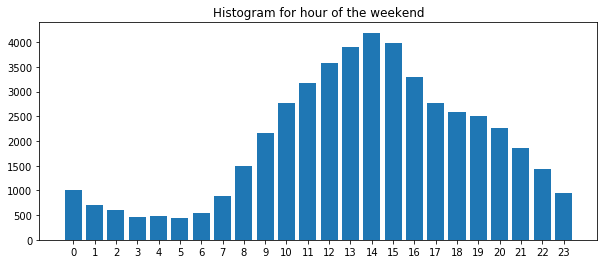

In [286]:
pl.figure(figsize=(10,4))
pl.bar(df[(df.day_of_week=='SABADO')|(df.day_of_week=='DOMINGO')].groupby('time').size().keys(),
       df[(df.day_of_week=='SABADO')|(df.day_of_week=='DOMINGO')].groupby('time').size())
pl.xticks(range(0,24))
pl.title('Histogram for hour of the weekend');

In [23]:
df.borough = df.borough.apply(lambda x: x.lower())

In [24]:
df_pop.NOM_LOC = df_pop.NOM_LOC.apply(lambda x: x.lower())

In [25]:
df_pop.NOM_LOC = df_pop.NOM_LOC.replace(to_replace = ['coyoacán', 'cuauhtémoc', 'benito juárez', 'álvaro obregón',
                                                      'tláhuac'], 
                                        value = ['coyoacan', 'cuauhtemoc', 'benito juarez', 'alvaro obregon', 
                                                 'tlahuac'])

In [26]:
df.borough = df.borough.replace(to_replace = ['cuajimalpa', 'gustavoa.madero','gustavo a madero'],
                  value = ['cuajimalpa de morelos', 'gustavo a.madero','gustavo a. madero'])

In [27]:
boro = {}

In [28]:
boro = boro.fromkeys(df.groupby('borough').size().sort_values(ascending=False).head(17).keys())

In [29]:
boro.pop('\\n')

In [30]:
accidents = np.array(df.groupby('borough').size().sort_values(ascending=False).head(17))

In [31]:
for i in range(0, len(boro)):
    if ((list(boro.keys())[i]!='\\n')&(list(boro.keys())[i]!='milpa alta')):
        boro[list(boro.keys())[i]]=int(accidents[i]*100000/int(df_pop[df_pop.NOM_LOC == list(boro.keys())[i]].P_TOTAL))
    elif list(boro.keys())[i]=='milpa alta':
        boro[list(boro.keys())[i]]=int(accidents[i]*100000/130582)

TypeError: cannot convert the series to <type 'int'>

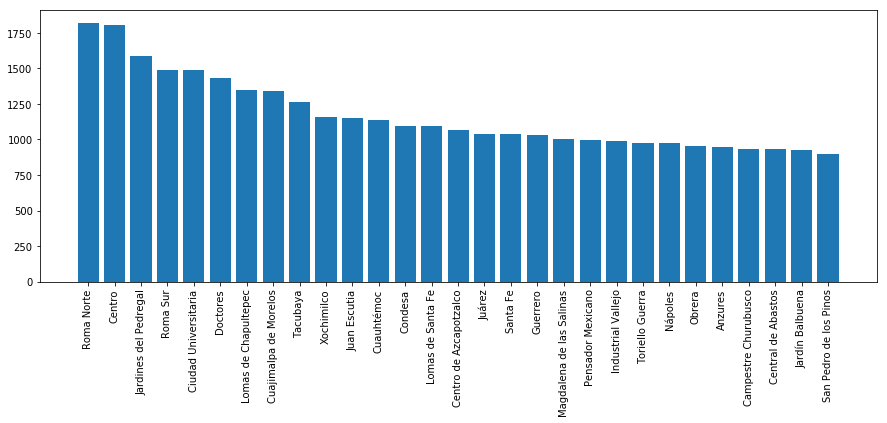

In [580]:
pl.figure(figsize=(15,5))
pl.bar(df.groupby('neighbourhood').size().sort_values(ascending=False).head(30).keys()[1:],
       np.array(df.groupby('neighbourhood').size().sort_values(ascending=False).head(30))[1:])
pl.xticks(rotation=90);

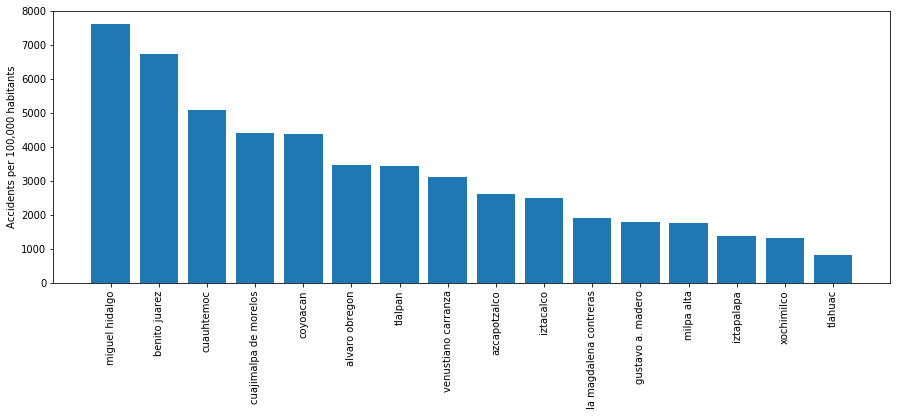

In [581]:
pl.figure(figsize=(15,5))
pl.bar(pd.DataFrame.from_dict(boro, orient='index', 
                              columns=['value']).sort_values('value',ascending=False).index.values.tolist()
    ,list(pd.DataFrame.from_dict(boro, orient='index', columns=['value']).sort_values('value',ascending=False).value))
pl.xticks(rotation=90)
pl.ylabel('Accidents per 100,000 habitants');

In [32]:
agem = {2:'azcapotzalco', 3: 'coyoacan', 4: 'cuajimalpa',
        5: 'gustavo a. madero', 6: 'iztacalco', 7:'iztapalapa',
       8: 'la magdalena contreras', 9: 'milpa alta', 10: 'alvaro obregon',
       11: 'tlahuac', 12: 'tlalpan', 13: 'xochimilco', 14: 'benito juarez',
       15: 'cuauhtemoc', 16: 'miguel hidalgo', 17: 'venustiano carranza'}

In [33]:
month = {'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6, 'JULIO': 7, 'AGOSTO': 8,
        'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12}

In [34]:
df.month = df.month.replace(to_replace = list(month.keys()), value = list(month.values()))

In [753]:
df_atus.ID_MUNICIPIO = df_atus.ID_MUNICIPIO.replace(to_replace = list(agem.keys()), value = list(agem.values()))

In [566]:
df_atus['dead'] = (df_atus.NEMUERTO!=0)|(df_atus.OTROMUERTO!=0)|(df_atus.PASAMUERTO!=0)|(df_atus.PEATMUERTO!=0)|(df_atus.CICLMUERTO!=0)

In [35]:
df['datetime'] = list(map(lambda t,d,m,y: str(t)+':00 '+str(d)+'/'+str(m)+'/'+str(y), 
                          df.time,df.day,df.month,df.year))

In [756]:
df_atus['datetime'] = list(map(lambda t,d,m,y: str(t)+':00 '+str(d)+'/'+str(m)+'/'+str(y), 
                         df_atus.ID_HORA, df_atus.ID_DIA, df_atus.MES, df_atus.ANIO))

match = list(map(lambda y: list(filter(lambda x: y==x, df_atus[df_atus.ID_MUNICIPIO==b].datetime)), 
                       df[df.borough==b].datetime))

Text(0.5,0,'age')

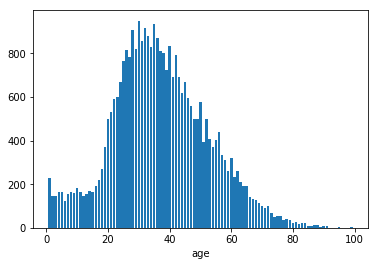

In [799]:
pl.bar(list(df.groupby('age').size().keys())[2:-1],
        list(df.groupby('age').size())[2:-1])
pl.xlabel('age')

In [36]:
df.dead = df.dead.replace(to_replace=['NO','SI'], value=[int(0),int(1)])

In [55]:
df_red = df.drop(['accident','cartodb_id','color','latitud','location','longitud','model','state',
                  'street', 'neighbourhood','the_geom', 'borough','the_geom_w','year','zip_code',
                  'datetime', 'relation','crane','infrastructure_works', 'insurance', 'month',
                  'injury_level','gender'], axis=1)

In [56]:
df_red.columns

Index([u'age', u'alcohol', u'ambulance', u'animal', u'bike', u'cause',
       u'damage_level', u'day', u'day_of_week', u'dead', u'driver', u'escape',
       u'explosion', u'hospitalized', u'impact_on', u'injured', u'loss',
       u'motorbike', u'pavement', u'rock', u'rollover', u'sleeping', u'taxi',
       u'time', u'tree', u'vehicle'],
      dtype='object')

In [57]:
df_red = df_red.replace(to_replace='\\N', value=np.nan)

In [58]:
df_red_1 = df_red.drop(['dead'],axis=1)

In [59]:
df_red_1 = df_red_1.dropna(how = 'any',axis=0)

In [60]:
df_red_2 = df_red_1.join(df_red[['dead']], how='left')

In [61]:
data_Unlabeled = df_red_2[np.isnan(df_red_2.dead)]

In [62]:
data = df_red_2[(df_red_2.dead==0)|(df_red_2.dead==1)]

In [63]:
X_Labeled_train, X_Labeled_test, y_Labeled_train, y_Labeled_test = train_test_split(data.drop('dead',axis=1),
                                                    data.dead, test_size=0.33, random_state=42)

In [64]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [65]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

# measure accuracy of the predicted probabilities
print 'Log-likelihood (train):',sum(np.log(y_pred_train*y_Labeled_train+(1-y_pred_train)*(1-y_Labeled_train)))
print 'Log-likelihood (test):',sum(np.log(y_pred_test*y_Labeled_test+(1-y_pred_test)*(1-y_Labeled_test)))

motorbike_1
0    0.956522
1    0.043478
Name: motorbike, dtype: float64

impact_on_0
Frontal                  0.429037
Trasero                  0.315943
Cofre                    0.059805
Costado der delantero    0.051831
Costado izq delantero    0.046920
Costado izq trasero      0.024116
Costado izq central      0.023095
Costado der trasero      0.022463
Costado der central      0.021539
Parte baja               0.003015
Toldo                    0.001313
Tapa cajuela             0.000924
Name: impact_on, dtype: float64

tree_1
0    1.0
Name: tree, dtype: float64

taxi_1
0    1.0
Name: taxi, dtype: float64

impact_on_1
Frontal                  0.543478
Cofre                    0.173913
Costado der trasero      0.086957
Trasero                  0.065217
Costado der delantero    0.043478
Costado izq delantero    0.021739
Costado izq trasero      0.021739
Costado izq central      0.021739
Costado der central      0.021739
Name: impact_on, dtype: float64

animal_1
0    1.0
Name: animal, dty

In [68]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled])
        X_for_M_step=X_for_M_step.reset_index()
        X_for_M_step=X_for_M_step.drop(['index'],axis=1)
        y_for_M_step=y_for_M_step.reset_index()
        y_for_M_step=y_for_M_step.drop(['index'],axis=1)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [73]:
X_Unlabeled_train=data_Unlabeled.drop('dead',axis=1)

In [74]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

Iteration 1 of 50


KeyboardInterrupt: 

In [75]:
y_pred_test

149177    4.644440e-10
251309    1.465731e-08
50274     6.932712e-09
249904    1.228484e-09
79819     6.689839e-15
209006    1.176049e-08
24411     6.779413e-08
1684      1.059304e-11
64112     6.297467e-13
91001     6.689079e-10
212103    2.778372e-09
79344     6.742502e-07
154747    4.968691e-10
186620    2.861094e-08
24218     6.481891e-08
47981     1.396863e-02
101514    2.263704e-08
26104     7.431658e-13
75134     4.470063e-13
154717    1.154633e-07
163260    2.469235e-07
34689     1.921802e-06
217111    1.753526e-08
52419     1.106961e-04
65282     7.787655e-09
103707    4.364256e-09
41678     6.998819e-08
50472     3.383089e-14
24619     1.285360e-06
233939    3.784551e-08
              ...     
9910      6.992948e-09
128147    3.982240e-12
227875    2.517341e-09
64960     1.063984e-15
218137    8.690598e-10
164733    5.489864e-08
112391    6.984658e-07
185043    2.723667e-08
233363    1.512910e-10
127056    1.051055e-03
84727     1.022236e-07
193960    4.795452e-08
156422    1